In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

In [2]:
# This dataset captures typing attempts of 110 users. Each user has attempted 8 times to type the string 'united states' and the corresponding timestamps of key press 
#and release relative to the first key press have been captured.
trainData = pd.read_csv("C:/Users/dell/Downloads/train.csv")
testData = pd.read_csv("C:/Users/dell/Downloads/test.csv")

In [3]:
testData.head()

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,0,96,239,337,407,537,740,839,928,1047,...,1831,1951,2032,2138,2430,2496,2567,2691,2824,2919
1,0,87,248,319,515,590,734,803,912,983,...,1839,1911,2103,2174,2383,2487,2575,2647,2815,2886
2,0,90,234,312,404,512,667,767,843,940,...,1572,1675,1771,1890,1948,2043,2147,2255,2540,2683
3,0,193,240,356,407,526,607,732,712,769,...,1600,1728,1744,1832,1904,2063,2148,2258,2336,2501
4,0,74,324,394,555,629,926,1026,1194,1328,...,2626,2754,2922,3068,3154,3259,3386,3453,3618,3698


In [4]:
trainData.shape

(880, 27)

In [6]:
testData.shape

(220, 26)

In [7]:
#apply operations on train file to know some information
trainData['user'].value_counts()
#user has attempted 8 times to type the string 'united states'

110    8
41     8
30     8
31     8
32     8
      ..
77     8
78     8
79     8
80     8
1      8
Name: user, Length: 110, dtype: int64

In [8]:
print('No. of rows in testing dataset:',len(testData))
print('No. of rows in training dataset:',len(trainData))
print('No. of users in training data :',trainData.user.nunique())

No. of rows in testing dataset: 220
No. of rows in training dataset: 880
No. of users in training data : 110


In [69]:
trainData.describe()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
count,880.000000,880.0,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,55.500000,0.0,69.740909,192.504545,280.730682,378.078409,460.992045,625.425000,719.445455,792.982955,...,1683.110227,1773.718182,1874.559091,1973.450000,2093.876136,2194.747727,2272.895455,2366.973864,2491.186364,2587.061364
std,31.771009,0.0,35.830579,118.281523,128.337586,243.485675,246.432639,359.327185,362.141729,403.595652,...,654.999470,657.806567,724.772838,725.310795,793.458930,792.913889,856.416953,856.341509,905.936922,905.291522
min,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,4.000000,14.000000,...,667.000000,763.000000,793.000000,924.000000,891.000000,1028.000000,955.000000,1055.000000,1124.000000,1188.000000
25%,28.000000,0.0,50.000000,152.000000,232.000000,281.000000,374.000000,463.000000,561.000000,592.750000,...,1288.500000,1375.000000,1433.500000,1532.500000,1589.750000,1708.000000,1741.750000,1834.250000,1930.500000,2034.500000
50%,55.500000,0.0,72.000000,192.000000,279.000000,358.000000,436.000000,569.000000,663.000000,721.500000,...,1526.000000,1618.500000,1695.000000,1791.500000,1896.000000,1994.000000,2059.500000,2151.000000,2255.500000,2344.000000
75%,83.000000,0.0,94.000000,231.250000,328.000000,424.000000,501.250000,706.500000,800.000000,888.500000,...,1921.250000,2004.000000,2145.000000,2256.000000,2390.250000,2474.500000,2585.750000,2687.250000,2823.250000,2905.750000
max,110.000000,0.0,241.000000,1287.000000,1343.000000,4333.000000,4453.000000,4823.000000,4890.000000,5191.000000,...,7377.000000,7471.000000,7663.000000,7753.000000,8006.000000,8063.000000,8189.000000,8259.000000,8422.000000,8487.000000


In [10]:
testData.describe()

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.0,67.086364,180.436364,270.572727,355.486364,436.563636,590.250000,687.000000,749.031818,834.240909,...,1586.400000,1677.186364,1767.172727,1871.527273,1960.290909,2061.990909,2123.113636,2220.845455,2342.854545,2436.250000
std,0.0,37.837272,99.484794,113.463567,216.169802,220.246148,304.223281,307.821807,334.202265,336.572112,...,498.599238,500.824623,567.680490,568.992480,607.669165,607.189415,647.334190,647.697421,680.152935,681.216067
min,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,...,317.000000,388.000000,412.000000,542.000000,508.000000,572.000000,688.000000,740.000000,867.000000,935.000000
25%,0.0,48.750000,144.750000,219.000000,284.250000,365.000000,463.750000,555.250000,573.000000,660.500000,...,1287.250000,1362.750000,1424.500000,1522.000000,1589.250000,1691.500000,1722.500000,1813.250000,1911.750000,2008.000000
50%,0.0,71.000000,185.000000,278.500000,348.000000,432.000000,567.000000,643.500000,711.000000,788.000000,...,1516.500000,1623.000000,1656.500000,1781.500000,1839.000000,1956.500000,2004.500000,2101.500000,2228.000000,2333.500000
75%,0.0,87.000000,232.000000,323.500000,405.250000,493.750000,665.250000,764.000000,852.750000,941.250000,...,1818.000000,1905.250000,2006.500000,2133.000000,2228.000000,2352.750000,2414.000000,2549.500000,2682.000000,2780.000000
max,0.0,216.000000,989.000000,1064.000000,2785.000000,2859.000000,2984.000000,3092.000000,3168.000000,3231.000000,...,3931.000000,4049.000000,4354.000000,4448.000000,4593.000000,4753.000000,4772.000000,4910.000000,5103.000000,5210.000000


In [11]:
#press-press duration (PPD), hold duration (HD), release-press duration (RPD)
#train part
trainDF1 = trainData
for i in range(1,13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i)]
#test part
testDF1 = testData
for i in range(1,13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i)]

In [12]:
trainDF1.head(8)

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,HD-10,HD-11,HD-12
0,1,0,120,216,312,424,496,592,664,808,...,72,48,72,96,48,48,72,72,48,72
1,1,0,95,168,265,360,455,527,599,736,...,72,71,71,71,56,48,47,72,72,48
2,1,0,71,143,231,783,903,1087,1159,1351,...,72,103,72,96,79,72,72,72,72,55
3,1,0,95,144,263,353,431,760,832,1159,...,72,48,50,91,47,72,48,72,72,72
4,1,0,70,166,238,310,406,526,598,710,...,72,48,72,96,72,72,62,72,72,96
5,1,0,72,144,240,312,413,520,591,712,...,71,71,47,47,150,45,37,71,71,71
6,1,0,95,143,240,335,423,592,663,807,...,71,96,55,104,73,81,48,72,72,72
7,1,0,74,144,240,312,376,473,544,688,...,71,72,48,80,48,94,48,96,69,48


In [19]:
## This dataset captures typing attempts of 110 users. Each user has attempted 8 times to type the string part 'united ' to
#compare speeds in writes full string vs first part of .
trainhalf= trainDF1
for i in range(1,7):
    trainhalf['PPD-'+str(i)]=trainDF1['PPD-'+str(i)]
    trainhalf['RPD-'+str(i)]=trainDF1['RPD-'+str(i)] 

for i in range(7):
    trainhalf['HD-'+str(i)]= trainDF1['HD-'+str(i)] 

In [20]:
trainhalf.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,HD-10,HD-11,HD-12
0,1,0,120,216,312,424,496,592,664,808,...,72,48,72,96,48,48,72,72,48,72
1,1,0,95,168,265,360,455,527,599,736,...,72,71,71,71,56,48,47,72,72,48
2,1,0,71,143,231,783,903,1087,1159,1351,...,72,103,72,96,79,72,72,72,72,55
3,1,0,95,144,263,353,431,760,832,1159,...,72,48,50,91,47,72,48,72,72,72
4,1,0,70,166,238,310,406,526,598,710,...,72,48,72,96,72,72,62,72,72,96


In [76]:
# now perform an exploratory data analysis on these features to understand the significant features.
# Check stats of first 8 users i.e. 8 x 8 typing patterns
n_Users = 8
if n_Users == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:n_Users*8]
analys1 = pd.DataFrame({'Min value':trainDF2.min(),'Max value':trainDF2.max()})
analys1.head()

,Min value,Max value
user,1,8
press-0,0,0
release-0,0,120
press-1,0,448
release-1,78,502


Text(0.5, 1.0, 'plot of PPD vs RPD')

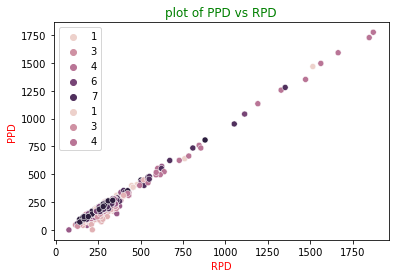

<Figure size 1440x1152 with 0 Axes>

In [91]:
#Let's check how a scatterplot of RPD v/s PPD will look like.
#Note, PPD = HD + RPD. 
#Thus, these should be almost linearly related which is evident from the following plot
for i in range(1,13):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)
import matplotlib.pyplot as plt
plt.xlabel('RPD',color='red')
plt.ylabel('PPD',color='red')
plt.figure(figsize=(20,16))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('plot of PPD vs RPD',color='green')

Text(0.5, 1.0, 'plot of PPD vs RPD for typing "united " part')

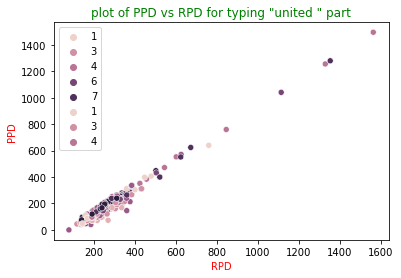

<Figure size 1440x1152 with 0 Axes>

In [118]:
for i in range(1,7):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)
import matplotlib.pyplot as plt
plt.xlabel('RPD',color='red')
plt.ylabel('PPD',color='red')
plt.figure(figsize=(20,16))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('plot of PPD vs RPD for typing "united " part',color='green')

In [39]:
#Instead of directly using these durations as inputs, we could group these durations into histograms which would represent groups of different typing speeds
#slow typer would have his keystroke durations falling in the histogram bucket of larger durations
# Training Data
drop_HD = ['PPD-'+str(i) for i in range(1,13,1)] + ['RPD-'+str(i) for i in range(1,13,1)] +['release-'+str(i) for i in range(13)]
trainDF1.drop(columns=drop_HD)
trainData_HD= trainDF1.drop(columns=drop_HD)
trainData_HD['id'] = trainData_HD.index #id's
#method converts the format of a DataFrame from wide to long.
trainData_HD = pd.wide_to_long(trainData_HD,['press-','HD-'],i='id',j='key_number').sort_values(by=['user','id','key_number'])

drop_PPD = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD = trainDF1.drop(columns=drop_PPD)
trainDF_PPD['id'] = trainDF_PPD.index
trainDF_PPD = pd.wide_to_long(trainDF_PPD,['press-','PPD-'],i='id',j='key_number').sort_values(by=['user','id','key_number'])

drop_RPD = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD = trainDF1.drop(columns=drop_RPD)
trainDF_RPD['id'] = trainDF_RPD.index
trainDF_RPD = pd.wide_to_long(trainDF_RPD,['press-','RPD-'],i='id',j='key_number').sort_values(by=['user','id','key_number'])

In [41]:
trainDF_RPD.head(14)

user  press-  RPD-
id key_number                    
0  1              1     216   312
   2              1     424   280
   3              1     592   240
   4              1     808   264
   5              1    1000   264
   6              1    1304   400
   7              1    1496   240
   8              1    1712   264
   9              1    1992   352
   10             1    2376   456
   11             1    2584   256
   12             1    2752   240
1  1              1     168   265
   2              1     360   287

In [42]:
## Test Data
testDF_HD_analysis = testDF1.drop(columns=drop_HD)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','HD-'],i='id',j='key_number').sort_values(by=['id','key_number'])

testDF_PPD_analysis = testDF1.drop(columns=drop_HD)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_number').sort_values(by=['id','key_number'])

testDF_RPD_analysis = testDF1.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','RPD-'],i='id',j='key_number').sort_values(by=['id','key_number'])

In [43]:
## Join these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')

trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')
trainDFCombined.head(17)

user  press-  HD-  RPD-  PPD-
id key_number key_no                               
0  1          0          1       0  120   312   216
              1          1     216   96   312   216
              2          1     424   72   312   216
              3          1     592   72   312   216
              4          1     808   48   312   216
              5          1    1000   72   312   216
              6          1    1304   96   312   216
              7          1    1496   48   312   216
              8          1    1712   48   312   216
              9          1    1992   72   312   216
              10         1    2376   72   312   216
              11         1    2584   48   312   216
              12         1    2752   72   312   216
   2          0          1       0  120   280   208
              1          1     216   96   280   208
              2          1     424   72   280   208
              3          1     592   72   280   208

In [51]:
noOfBins = 11
#train
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPDEnc'],RPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPDEnc'],PPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPDEnc'] = trainDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPDEnc'] = trainDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

#test
labels = [i for i in range(noOfBins)]

testDFCombined['HDEnc'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPDEnc'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPDEnc'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

testDFCombined['HDEnc'] = testDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPDEnc'] = testDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPDEnc'] = testDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

In [52]:
trainDFCombined

user  press-  HD-   RPD-   PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                        
0   0          1       0  120    NaN    NaN      8    -1.0    -1.0
    1          1     216   96  312.0  216.0      6     7.0     7.0
    2          1     424   72  280.0  208.0      3     6.0     5.0
    3          1     592   72  240.0  168.0      3     4.0     3.0
    4          1     808   48  264.0  216.0      0     7.0     4.0
...          ...     ...  ...    ...    ...    ...     ...     ...
879 8        110    1561   63  279.0  216.0      1     7.0     5.0
    9        110    1679  119  237.0  118.0      8     1.0     3.0
    10       110    1838  128  287.0  159.0      9     3.0     6.0
    11       110    1991  105  258.0  153.0      8     3.0     4.0
    12       110    2199  159  367.0  208.0     10     6.0     9.0

[11440 rows x 8 columns]

In [53]:
#the average bin for each keystroke for each user.
trainDFCombinedHDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('user')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('user')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('user')['RPD'].apply(np.array)

trainDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

trainDF_UserProps = pd.DataFrame(trainDF_UserProps.HD.tolist(),index = trainDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_UserProps.PPD.tolist(),index = trainDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_UserProps.RPD.tolist(),index = trainDF_UserProps.index).add_prefix('RPD_')
)

# Average bin keystrokes for each of the 110 users
trainDF_UserProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
1,4.625,6.000,5.125,2.625,2.500,1.625,4.500,2.750,2.500,0.875,...,5.875,6.000,5.250,2.125,4.375,5.000,6.375,6.250,4.125,3.375
2,5.750,9.375,9.000,7.875,6.625,5.750,4.375,4.875,9.500,8.250,...,3.375,0.625,5.750,2.875,3.375,7.125,3.625,3.750,1.500,6.875
3,4.125,4.750,4.000,6.500,5.250,8.125,4.750,5.750,3.000,4.875,...,4.750,0.500,7.750,2.875,4.500,3.750,3.500,6.750,0.250,5.375
4,2.625,3.375,3.000,3.875,4.500,4.000,3.250,7.500,3.125,7.750,...,9.500,4.000,6.750,4.125,10.000,6.250,6.375,5.500,5.750,8.000
5,2.375,6.500,6.000,2.000,5.500,4.250,0.250,5.250,1.750,6.125,...,5.375,3.875,4.625,5.375,4.750,1.875,3.125,3.000,3.000,7.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3.500,1.625,1.625,2.625,3.250,1.625,1.750,3.125,3.250,1.250,...,8.375,2.125,3.750,4.625,4.000,2.625,1.625,4.875,1.625,5.000
107,1.875,9.250,7.625,7.375,3.500,2.875,3.125,4.625,2.875,4.250,...,2.500,0.125,4.125,2.875,1.500,0.875,1.875,7.375,3.500,0.250
108,2.000,4.625,2.500,8.625,3.000,2.125,1.625,3.000,4.875,3.125,...,4.875,1.375,6.875,5.625,3.500,5.750,4.625,6.125,1.625,4.625


In [54]:
trainDFCombinedHDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('id')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('id')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('id')['RPD'].apply(np.array)

testDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

testDF_UserProps = pd.DataFrame(testDF_UserProps.HD.tolist(),index = testDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_UserProps.PPD.tolist(),index = testDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_UserProps.RPD.tolist(),index = testDF_UserProps.index).add_prefix('RPD_')
)

# Bin allocation 
testDF_UserProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
id,,,,,,,,,,,,,,,,,,,,,
0,6.0,7.0,9.0,7.0,8.0,8.0,9.0,9.0,8.0,8.0,...,10.0,7.0,9.0,5.0,10.0,4.0,7.0,10.0,4.0,8.0
1,5.0,2.0,4.0,2.0,2.0,2.0,6.0,2.0,3.0,2.0,...,6.0,4.0,10.0,4.0,2.0,8.0,8.0,9.0,4.0,7.0
2,5.0,4.0,8.0,7.0,7.0,7.0,10.0,8.0,7.0,8.0,...,9.0,5.0,8.0,8.0,4.0,5.0,7.0,5.0,7.0,10.0
3,10.0,8.0,8.0,9.0,1.0,6.0,10.0,9.0,9.0,5.0,...,8.0,0.0,4.0,7.0,10.0,7.0,3.0,7.0,8.0,8.0
4,4.0,2.0,4.0,7.0,9.0,8.0,6.0,5.0,9.0,10.0,...,10.0,9.0,9.0,10.0,10.0,7.0,10.0,8.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,6.0,1.0,7.0,10.0,8.0,6.0,4.0,6.0,2.0,3.0,...,10.0,1.0,8.0,3.0,3.0,9.0,9.0,10.0,1.0,8.0
216,5.0,2.0,4.0,9.0,5.0,7.0,4.0,2.0,1.0,4.0,...,3.0,2.0,7.0,2.0,3.0,4.0,0.0,1.0,2.0,7.0
217,5.0,5.0,9.0,10.0,1.0,5.0,8.0,8.0,8.0,6.0,...,9.0,3.0,4.0,9.0,10.0,10.0,10.0,9.0,4.0,2.0


In [55]:
#instead of finding the average bin for each keystroke over 8 typing patterns, we retain all of the typing patterns.
#This could help us identify the closest key dynamics signature for a user.
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPDEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RPD_')
).reset_index().set_index('user').drop(columns=['id'])

trainDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
1,8,6,3,3,0,3,6,0,0,3,...,3.0,4.0,4.0,9.0,3.0,4.0,8.0,10.0,4.0,3.0
1,6,7,6,3,2,2,2,1,0,0,...,3.0,5.0,4.0,0.0,4.0,4.0,6.0,6.0,3.0,3.0
1,2,5,8,3,7,3,6,4,3,3,...,9.0,9.0,5.0,3.0,1.0,6.0,7.0,6.0,4.0,4.0
1,6,8,4,3,0,1,5,0,3,0,...,10.0,10.0,2.0,4.0,10.0,4.0,7.0,6.0,4.0,3.0
1,2,3,6,3,0,3,6,3,3,1,...,6.0,3.0,3.0,0.0,3.0,6.0,6.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4,5,0,7,6,10,9,9,7,7,...,2.0,2.0,8.0,3.0,10.0,6.0,3.0,4.0,4.0,10.0
110,5,3,5,7,7,10,5,7,8,7,...,10.0,3.0,8.0,1.0,7.0,5.0,4.0,8.0,6.0,8.0
110,4,5,9,8,5,10,8,8,9,7,...,9.0,1.0,9.0,5.0,8.0,7.0,5.0,6.0,7.0,9.0


In [56]:
trainDF_HDTemp = testDFCombined.reset_index().groupby(['id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = testDFCombined.reset_index().groupby(['id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = testDFCombined.reset_index().groupby(['id'])['RPDEnc'].apply(np.array)

testDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

testDF_User_AllSampleProps = pd.DataFrame(testDF_User_AllSampleProps.HD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_User_AllSampleProps.PPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_User_AllSampleProps.RPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('RPD_')
)

testDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
id,,,,,,,,,,,,,,,,,,,,,
0,6.0,7.0,9.0,7.0,8.0,8.0,9.0,9.0,8.0,8.0,...,10.0,7.0,9.0,5.0,10.0,4.0,7.0,10.0,4.0,8.0
1,5.0,2.0,4.0,2.0,2.0,2.0,6.0,2.0,3.0,2.0,...,6.0,4.0,10.0,4.0,2.0,8.0,8.0,9.0,4.0,7.0
2,5.0,4.0,8.0,7.0,7.0,7.0,10.0,8.0,7.0,8.0,...,9.0,5.0,8.0,8.0,4.0,5.0,7.0,5.0,7.0,10.0
3,10.0,8.0,8.0,9.0,1.0,6.0,10.0,9.0,9.0,5.0,...,8.0,0.0,4.0,7.0,10.0,7.0,3.0,7.0,8.0,8.0
4,4.0,2.0,4.0,7.0,9.0,8.0,6.0,5.0,9.0,10.0,...,10.0,9.0,9.0,10.0,10.0,7.0,10.0,8.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,6.0,1.0,7.0,10.0,8.0,6.0,4.0,6.0,2.0,3.0,...,10.0,1.0,8.0,3.0,3.0,9.0,9.0,10.0,1.0,8.0
216,5.0,2.0,4.0,9.0,5.0,7.0,4.0,2.0,1.0,4.0,...,3.0,2.0,7.0,2.0,3.0,4.0,0.0,1.0,2.0,7.0
217,5.0,5.0,9.0,10.0,1.0,5.0,8.0,8.0,8.0,6.0,...,9.0,3.0,4.0,9.0,10.0,10.0,10.0,9.0,4.0,2.0


In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

def evaluateEER(user_scores, imposter_scores):
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)
#    print 'fpr','tpr','thres',fpr,tpr,thresholds
    missrates = 1 - tpr
    farates = fpr
#    array = np.zeros((123,3))
#    array[:,0] = missrates
#    array[:,1] = farates
#    array[:,2] = thresholds
    dists = missrates - farates
    idx1 = np.argmin(dists[dists >= 0])
    idx2 = np.argmax(dists[dists < 0])
    x = [missrates[idx1], farates[idx1]]
    y = [missrates[idx2], farates[idx2]]
    a = ( x[0] - x[1] ) / ( y[1] - x[1] - y[0] + x[0] )
    eer = x[0] + a * ( y[0] - x[0] )
    return eer

In [ ]:
import numpy as np
np.set_printoptions(suppress = True)

def evaluateEERGMM(user_scores, imposter_scores):
    thresholds = range(20,51)
    array = np.zeros((len(thresholds),3))
    i = 0
    for th in thresholds:
        g_i = 0
        i_g = 0
        for score in user_scores:
            if score < th:
                g_i = g_i + 1
        for score in imposter_scores:    
            if score > th:
                i_g = i_g + 1

        FA = float(i_g) / len(imposter_scores) 
        FR = float(g_i) / len(user_scores)
        array[i, 0] = th
        array[i, 1] = FA
        array[i, 2] = FR
        i = i + 1
    
    for j in range(array.shape[0]):
        if array[j,1] < array[j,2]:
            thresh = (array[j,0] + array[j - 1, 0]) / 2
            break
    g_i = 0
    i_g = 0
    for score in user_scores:
        if score < thresh:
            g_i = g_i + 1
    for score in imposter_scores:    
        if score > thresh:
            i_g = i_g + 1

    FA = float(i_g) / len(imposter_scores) 
    FR = float(g_i) / len(user_scores)
    return (FA + FR) /2

In [58]:
#GMMs can be used for determining whether a test typing vector belongs to one user or not since it has been proved in many studies that the digraph 
#patterns present in keystroke data are generated by Gaussian distributions.
import numpy as np
import pandas 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
import warnings
warnings.filterwarnings("ignore")
 
class GMMDetector:
 
    def training(self):
        self.gmm = GMM(n_components = 2, covariance_type = 'diag', 
                        verbose = False )
        self.gmm.fit(self.train)
  
    def testing(self):
        for i in range(self.test_genuine.shape[0]):
            j = self.test_genuine.iloc[i].values
            cur_score = self.gmm.score(j)
            self.user_scores.append(cur_score)
  
        for i in range(self.test_imposter.shape[0]):
            j = self.test_imposter.iloc[i].values
            cur_score = self.gmm.score(j)
            self.imposter_scores.append(cur_score)

path = "C:/Users/dell/Downloads/train.csv" 
data = pandas.read_csv(path)
subjects = data["user"].unique()
print ("average EER for GMM detector:")
print(GMMDetector(subjects).evaluate())

average EER for GMM detector:


In [55]:
#Keystroke_ManhattanFiltered.py
 
from scipy.spatial.distance import euclidean
class ManhattanFilteredDetector:
#just the training() function changes, rest all remains same.
    def training(self):
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        dropping_indices = []
        for i in range(self.train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, 
                                   self.mean_vector)
            if (cur_score > 3*self.std_vector).all() == True:
                dropping_indices.append(i)
        self.train = self.train.drop(self.train.index[dropping_indices])
        self.mean_vector = self.train.mean().values

In [60]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost.sklearn import XGBClassifier
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'multi:softmax',
    num_class=trainY_allSamples.nunique(),
    nthread=4,
    seed=27)
param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100,200,210,230,250,270,290,310,330],
    'max_depth': range(4,10,1)
}
gsearch2b = GridSearchCV(estimator = xgb1,param_grid = param_search, scoring='accuracy',n_jobs=4,iid=False,cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0), verbose=1)
gsearch2b.fit(trainX_allSamples, trainY_allSamples)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 15.5min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 23.9min finished
C:\Users\dell\anaconda3\New folder\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\dell\anaconda3\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 24min 2s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     ma...
                                     num_class=110, num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
    

In [61]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []
for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
    gsearch2b.best_estimator_.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
    acc = accuracy_score(gsearch2b.best_estimator_.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])
    print('Accuracy Score:', acc)
    accs += [acc]
print('Average Accuracy:',sum(accs)/len(accs))

[21:15:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy Score: 0.7443181818181818
[21:15:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7556818181818182
[21:15:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7329545454545454
[21:15:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.6931818181818182
[21:16:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric 

Text(0.5, 1.0, 'Line plots for each key sequence')

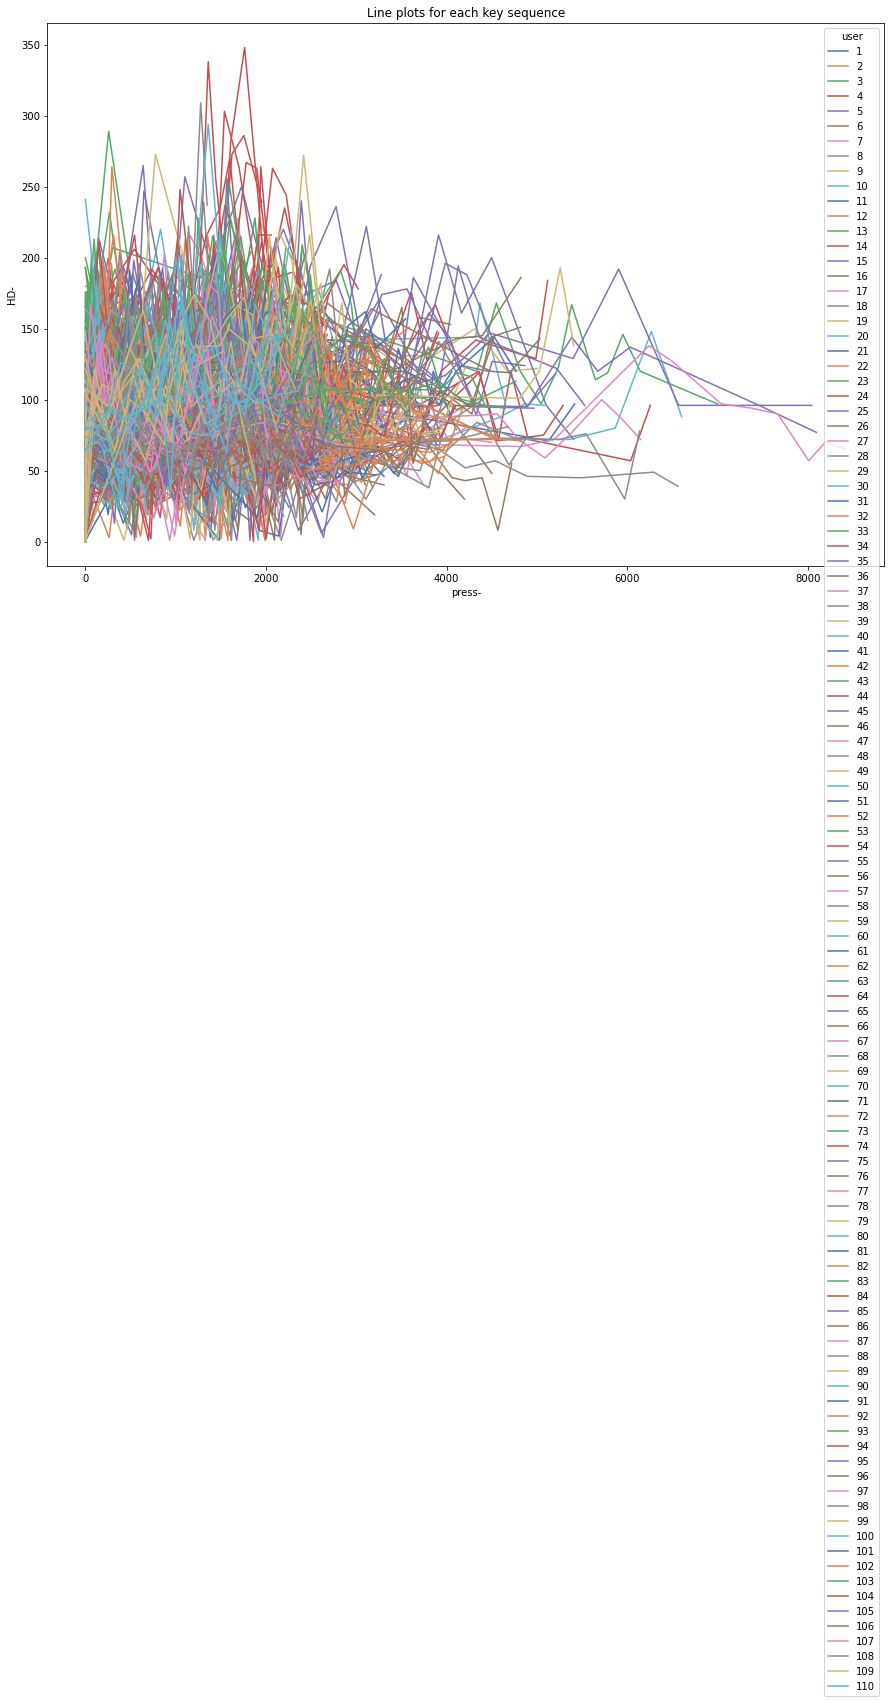

In [51]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainData_HD.reset_index(),
             palette='deep').set_title('Line plots for each key sequence')

<AxesSubplot:xlabel='press-', ylabel='PPD-'>

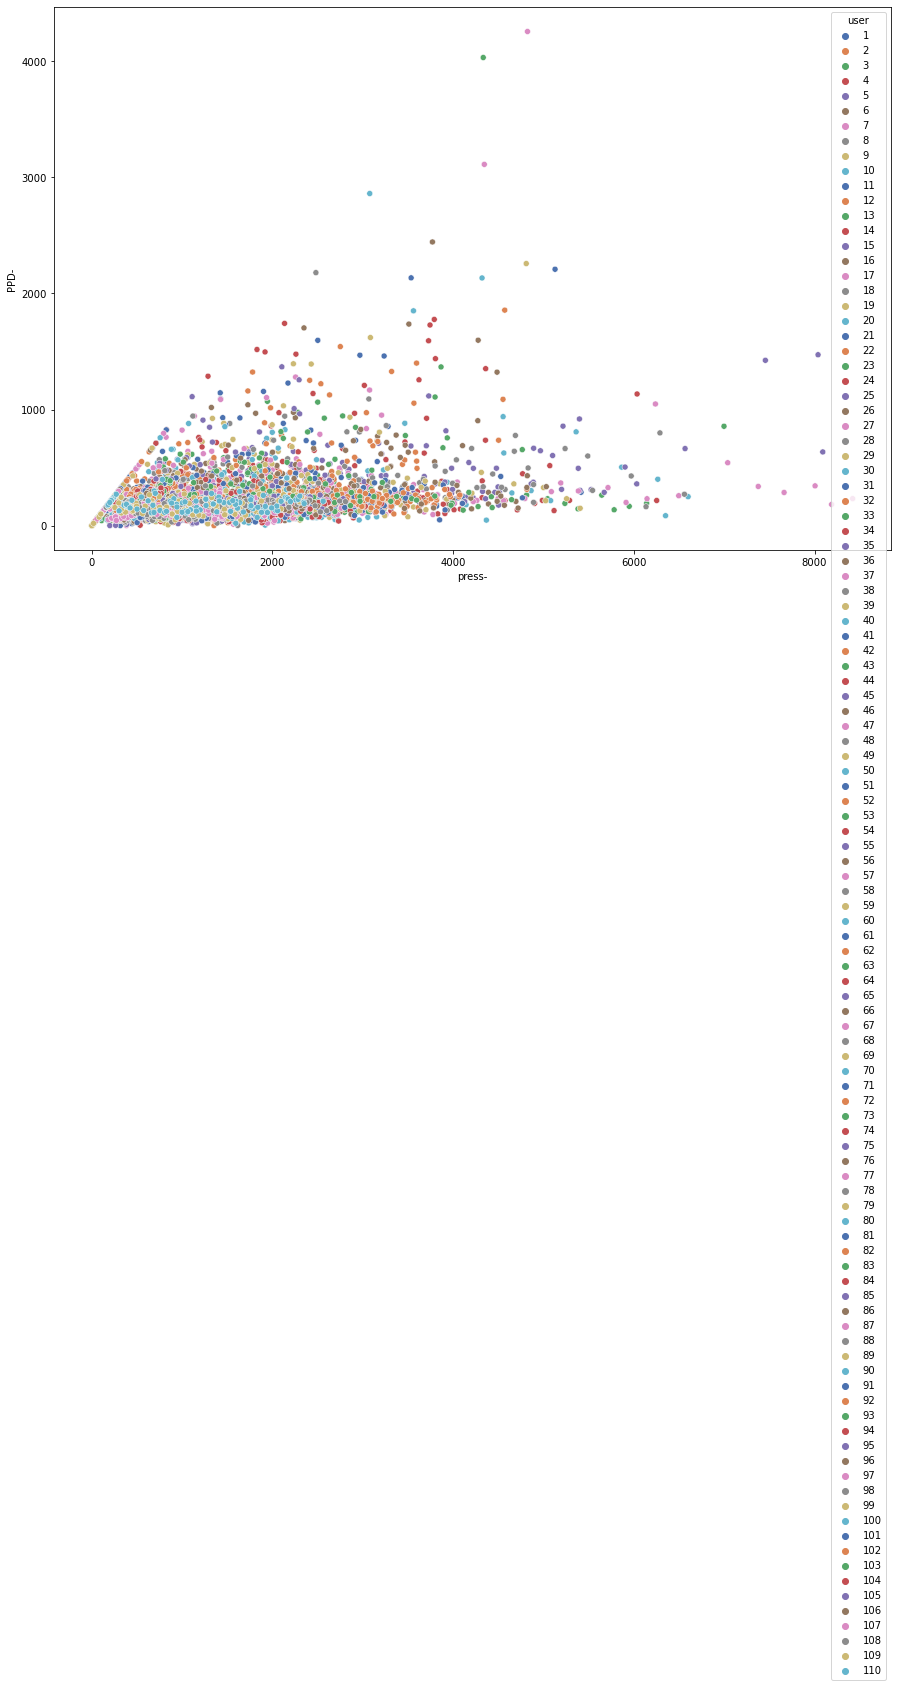

In [52]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD,palette='deep')

C:\Users\dell\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

Text(0.5, 1.0, 'Hist of user avg')

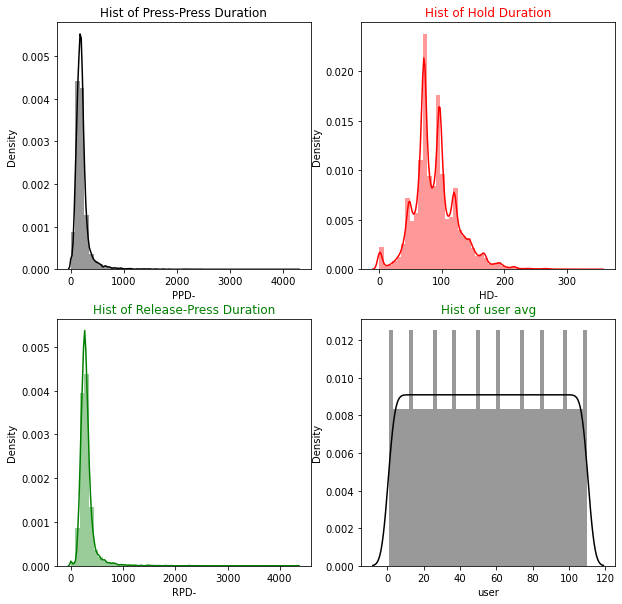

In [53]:
#The following figures are histograms of HD, PPD, RPD. This makes it clear to have bucketing for better classification.
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.distplot(trainDFCombined['RPD-'],color='green').set_title('Hist of Release-Press Duration',color='green')
plt.subplot(2,2,2)
sns.distplot(trainDFCombined['HD-'],color='red').set_title('Hist of Hold Duration',color='red')
plt.subplot(2,2,1)
sns.distplot(trainDFCombined['PPD-'],color='black').set_title('Hist of Press-Press Duration',color='black')
plt.subplot(2,2,4)
sns.distplot(trainDFCombined['user'],color='black').set_title('Hist of user avg',color='green')